# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding batch normalization layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [3]:
# create random number generator
seed = 42

In [4]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [5]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [6]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [7]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [8]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Without Batch Normalization</ol>

In [9]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [10]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [11]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [12]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 8s 590ms/step - loss: 0.6558 - accuracy: 0.6148 - val_loss: 0.6368 - val_accuracy: 0.6374
Epoch 2/50
13/13 [==============================] - 2s 165ms/step - loss: 0.6243 - accuracy: 0.6622 - val_loss: 0.6234 - val_accuracy: 0.6516
Epoch 3/50
13/13 [==============================] - 2s 163ms/step - loss: 0.6115 - accuracy: 0.6835 - val_loss: 0.6158 - val_accuracy: 0.6615
Epoch 4/50
13/13 [==============================] - 2s 186ms/step - loss: 0.6007 - accuracy: 0.7005 - val_loss: 0.6385 - val_accuracy: 0.6246
Epoch 5/50
13/13 [==============================] - 3s 200ms/step - loss: 0.6063 - accuracy: 0.6689 - val_loss: 0.5957 - val_accuracy: 0.6941
Epoch 6/50
13/13 [==============================] - 3s 195ms/step - loss: 0.5871 - accuracy: 0.7084 - val_loss: 0.5927 - val_accuracy: 0.7025
Epoch 7/50
13/13 [==============================] - 2s 167ms/step - loss: 0.5823 - accuracy: 0.7114 - val_loss: 0.5889 - val_accuracy: 0.6870
Epoch 

## 7. Evaluating model performance 

In [13]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.7209631728045326


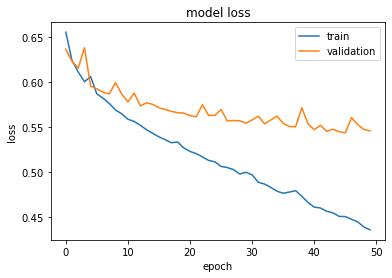

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Defining the model architecture

### <ol>With Batch Normalization</ol>

In [15]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [16]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 15,063,501
Trainable params: 15,063,301
Non-trainable params: 200
_________________________________________________________________


## Compiling the model

In [17]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## Training the model

In [18]:
# training the model for 50 epochs using Batch Normalization

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 9s 704ms/step - loss: 0.6660 - accuracy: 0.6519 - val_loss: 0.6714 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 2s 171ms/step - loss: 0.5290 - accuracy: 0.7461 - val_loss: 0.6733 - val_accuracy: 0.5652
Epoch 3/50
13/13 [==============================] - 2s 157ms/step - loss: 0.4688 - accuracy: 0.7861 - val_loss: 0.6704 - val_accuracy: 0.6402
Epoch 4/50
13/13 [==============================] - 2s 158ms/step - loss: 0.4092 - accuracy: 0.8269 - val_loss: 0.6703 - val_accuracy: 0.5666
Epoch 5/50
13/13 [==============================] - 2s 162ms/step - loss: 0.3545 - accuracy: 0.8651 - val_loss: 0.6655 - val_accuracy: 0.6261
Epoch 6/50
13/13 [==============================] - 2s 189ms/step - loss: 0.3102 - accuracy: 0.8913 - val_loss: 0.6616 - val_accuracy: 0.6346
Epoch 7/50
13/13 [==============================] - 3s 198ms/step - loss: 0.2641 - accuracy: 0.9198 - val_loss: 0.6596 - val_accuracy: 0.6360
Epoch 

## Evaluating model performance

In [19]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7181303116147308 %


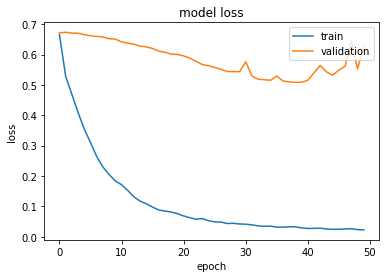

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [27]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               15052900  
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 15,063,901
Trainable params: 15,063,501
Non-trainable params: 400
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [29]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 4s 337ms/step - loss: 0.7383 - accuracy: 0.6440 - val_loss: 0.7131 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 2s 160ms/step - loss: 0.5017 - accuracy: 0.7734 - val_loss: 0.6987 - val_accuracy: 0.4391
Epoch 3/50
13/13 [==============================] - 2s 156ms/step - loss: 0.3950 - accuracy: 0.8311 - val_loss: 0.6956 - val_accuracy: 0.4462
Epoch 4/50
13/13 [==============================] - 2s 167ms/step - loss: 0.3085 - accuracy: 0.8846 - val_loss: 0.6968 - val_accuracy: 0.4391
Epoch 5/50
13/13 [==============================] - 2s 170ms/step - loss: 0.2409 - accuracy: 0.9235 - val_loss: 0.6887 - val_accuracy: 0.4547
Epoch 6/50
13/13 [==============================] - 2s 158ms/step - loss: 0.1939 - accuracy: 0.9435 - val_loss: 0.6841 - val_accuracy: 0.4915
Epoch 7/50
13/13 [==============================] - 2s 162ms/step - loss: 0.1394 - accuracy: 0.9733 - val_loss: 0.6681 - val_accuracy: 0.5992
Epoch 

In [30]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Accuracy on validation set: 0.7492917847025495


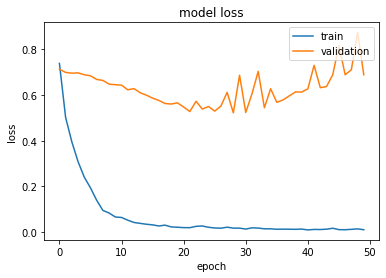

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()